In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("./data/EUR_USD.csv")

In [7]:
df.rename(columns={"price":"close"},inplace=True)

In [8]:
if "Vol." in df.columns:
    df.drop(columns=["Vol."],inplace=True)

In [9]:
df["Date"]=pd.to_datetime(df["Date"],dayfirst=True)

In [10]:
df = df.sort_values("Date").reset_index(drop=True)

In [11]:
df.head()

,Date,Price,Open,High,Low,Change %
0,2001-01-22,0.9393,0.9342,0.9406,0.9270,0.61%
1,2001-01-22,0.9393,0.9342,0.9406,0.9270,0.61%
2,2001-01-23,0.9376,0.9392,0.9452,0.9370,-0.18%
3,2001-01-23,0.9376,0.9392,0.9452,0.9370,-0.18%
4,2001-01-24,0.9210,0.9374,0.9380,0.9213,-1.77%


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11284 entries, 0 to 11283
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      11284 non-null  datetime64[ns]
 1   Price     11284 non-null  float64       
 2   Open      11284 non-null  float64       
 3   High      11284 non-null  float64       
 4   Low       11284 non-null  float64       
 5   Change %  11284 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 529.1+ KB


In [16]:
df.columns = df.columns.str.strip().str.lower()

In [17]:
df['target'] = (df['price'].shift(-1) > df['price']).astype(int)

In [18]:
print("Columns now:", df.columns)

Columns now: Index(['date', 'price', 'open', 'high', 'low', 'change %', 'target'], dtype='object')


In [23]:
df.dropna(inplace=True)

In [24]:
df['ma_5'] = df['price'].rolling(window=5).mean()

In [25]:
df['ma_20'] = df['price'].rolling(window=20).mean()

In [26]:
df['daily_return'] = df['price'].pct_change()

In [27]:
df.dropna(inplace=True)

In [28]:
X = df[['open', 'high', 'low', 'price', 'ma_5', 'ma_20', 'daily_return']]
y = df['target']

In [29]:
split = int(0.8 * len(df))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Logistic Regression Accuracy: 0.6170


Classification Report:

              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1390
           1       0.00      0.00      0.00       863

    accuracy                           0.62      2253
   macro avg       0.31      0.50      0.38      2253
weighted avg       0.38      0.62      0.47      2253



C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classif

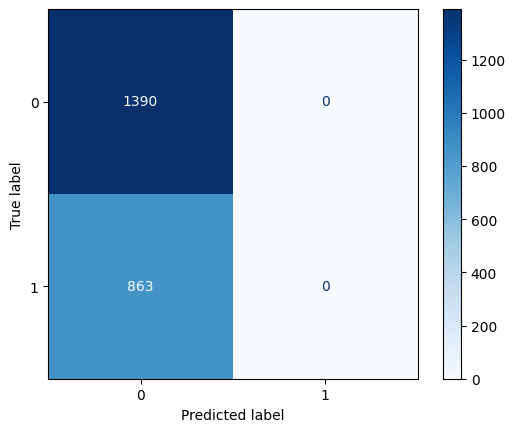

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)
y_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.4212
              precision    recall  f1-score   support

           0       0.58      0.22      0.32      1390
           1       0.37      0.74      0.49       863

    accuracy                           0.42      2253
   macro avg       0.48      0.48      0.41      2253
weighted avg       0.50      0.42      0.39      2253



Classification Report:

              precision    recall  f1-score   support

           0       0.58      0.22      0.32      1390
           1       0.37      0.74      0.49       863

    accuracy                           0.42      2253
   macro avg       0.48      0.48      0.41      2253
weighted avg       0.50      0.42      0.39      2253



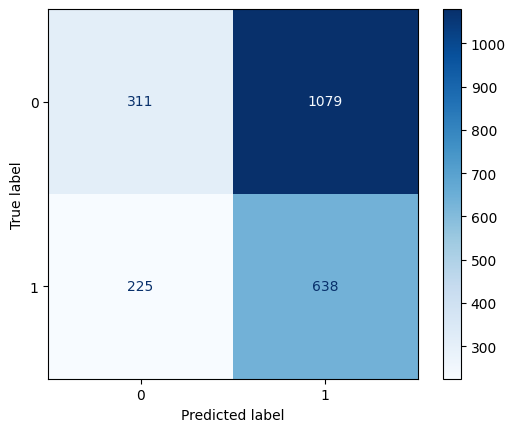

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

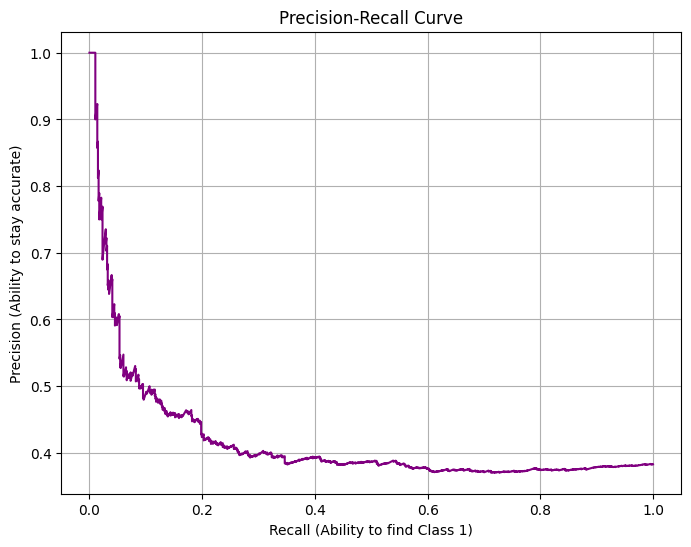

In [43]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label='PR Curve')
plt.xlabel('Recall (Ability to find Class 1)')
plt.ylabel('Precision (Ability to stay accurate)')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()